<a href="https://colab.research.google.com/github/zjl-07/project-kuliah/blob/master/ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Tugas ANN** 

*Model 2 : 3 Convolutional Layers*

Nama Anggota
1.   Emilda - 2101655393
2.   Rindy - 2101627692



# Importing Libraries

In [0]:
#import necessary libray
from __future__ import absolute_import, division, print_function, unicode_literals
try:
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split



TensorFlow 2.x selected.


# Loading Fashion_Mnist Dataset

In [0]:
#loading fashion_mnist data
(images_train, labels_train), (images_test, labels_test) = tf.keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


# Data Visualizations :

In [0]:
# Print training set shape
print("images_train shape:", images_train.shape, "labels_train shape:", labels_train.shape)

# Print the number of training set and testing set
print(images_train.shape[0], 'train set')
print(images_test.shape[0], 'test set')


images_train shape: (60000, 28, 28) labels_train shape: (60000,)
60000 train set
10000 test set


2
label index = 2
label Name= Pullover


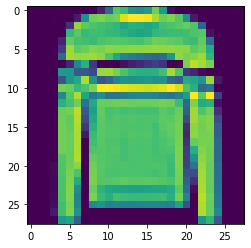

In [0]:
target_dict = {
 0: 'T-shirt/top',
 1: 'Trouser',
 2: 'Pullover',
 3: 'Dress',
 4: 'Coat',
 5: 'Sandal',
 6: 'Shirt',
 7: 'Sneaker',
 8: 'Bag',
 9: 'Ankle boot',
}

img_index = 5
label_index = labels_train[img_index]
print(label_index)

# Print the label, for example 2 Pullover
print ("label index = " + str(label_index))
print("label Name= " + str(target_dict[label_index]))
plt.imshow(images_train[img_index])

# Data Normalization


In [0]:
images_train = images_train.astype('float32')
images_test = images_test.astype('float32')
images_train /= 255
images_test /= 255

# Splitting data into validation, testing and training using train_test_split

In [0]:
images_train, images_val, labels_train, labels_val = train_test_split(images_train, labels_train, test_size=0.2, random_state=12345)

In [0]:
#Showing all of the dataset size for training, validating, and testing
print(images_train.shape)
print(labels_train.shape)
print(images_val.shape)
print(labels_val.shape)
print(images_test.shape)
print(labels_test.shape)

(48000, 28, 28)
(48000,)
(12000, 28, 28)
(12000,)
(10000, 28, 28)
(10000,)


# Creating Model Architecture with  3 Convolutional Layers

In [0]:
img_rows = 28
img_cols = 28
input_shape = (img_rows, img_cols, 1)

#building 3 Convolutional Layers Model
model = keras.Sequential([
    keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Dropout(0.2),

    keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Dropout(0.2),

    keras.layers.Conv2D(128, kernel_size=(3, 3), activation='relu'),
    keras.layers.Dropout(0.2),

    keras.layers.Flatten(),

    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation='softmax')
])

# Optimization

In [0]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=keras.optimizers.Adam(lr=0.0001),
              metrics=['accuracy'])

# Training

In [0]:
batch_size = 600

#reshapping dataset
images_train = images_train.reshape(images_train.shape[0], img_rows, img_cols, 1)
images_test = images_test.reshape(images_test.shape[0], img_rows, img_cols, 1)
images_val = images_val.reshape(images_val.shape[0], img_rows, img_cols, 1)

print(images_train.shape)
print(images_val.shape)
print(images_test.shape)


(48000, 28, 28, 1)
(12000, 28, 28, 1)
(10000, 28, 28, 1)


# Training Data


In [0]:
#Training Dataset
model.fit(images_train, labels_train,
          batch_size=batch_size,
          epochs=10,
          verbose=2,
          validation_data=(images_val, labels_val))

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 - 43s - loss: 0.2058 - accuracy: 0.9228 - val_loss: 0.2125 - val_accuracy: 0.9211
Epoch 2/10
48000/48000 - 43s - loss: 0.2029 - accuracy: 0.9243 - val_loss: 0.2126 - val_accuracy: 0.9219
Epoch 3/10
48000/48000 - 43s - loss: 0.2048 - accuracy: 0.9214 - val_loss: 0.2104 - val_accuracy: 0.9231
Epoch 4/10
48000/48000 - 43s - loss: 0.2045 - accuracy: 0.9225 - val_loss: 0.2109 - val_accuracy: 0.9237
Epoch 5/10
48000/48000 - 43s - loss: 0.2020 - accuracy: 0.9251 - val_loss: 0.2110 - val_accuracy: 0.9222
Epoch 6/10
48000/48000 - 43s - loss: 0.2013 - accuracy: 0.9233 - val_loss: 0.2099 - val_accuracy: 0.9236
Epoch 7/10
48000/48000 - 43s - loss: 0.2038 - accuracy: 0.9235 - val_loss: 0.2108 - val_accuracy: 0.9237
Epoch 8/10
48000/48000 - 43s - loss: 0.2014 - accuracy: 0.9233 - val_loss: 0.2096 - val_accuracy: 0.9243
Epoch 9/10
48000/48000 - 43s - loss: 0.1998 - accuracy: 0.9259 - val_loss: 0.2094 - val_accuracy: 0.9237
Epoch

# Result

In [0]:
#Print the result
score = model.evaluate(images_test, labels_test, verbose=0)
print('Test loss:', score[0]*100)
print('Test accuracy:', score[1]*100)

Test loss: 23.184293226003646
Test accuracy: 91.71000123023987


# Display Result


In [0]:
#displaying result in graph using pyplot from matplotlib
predictions = model.predict(images_test)
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(target_dict[predicted_label],
                                100*np.max(predictions_array),
                                target_dict[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

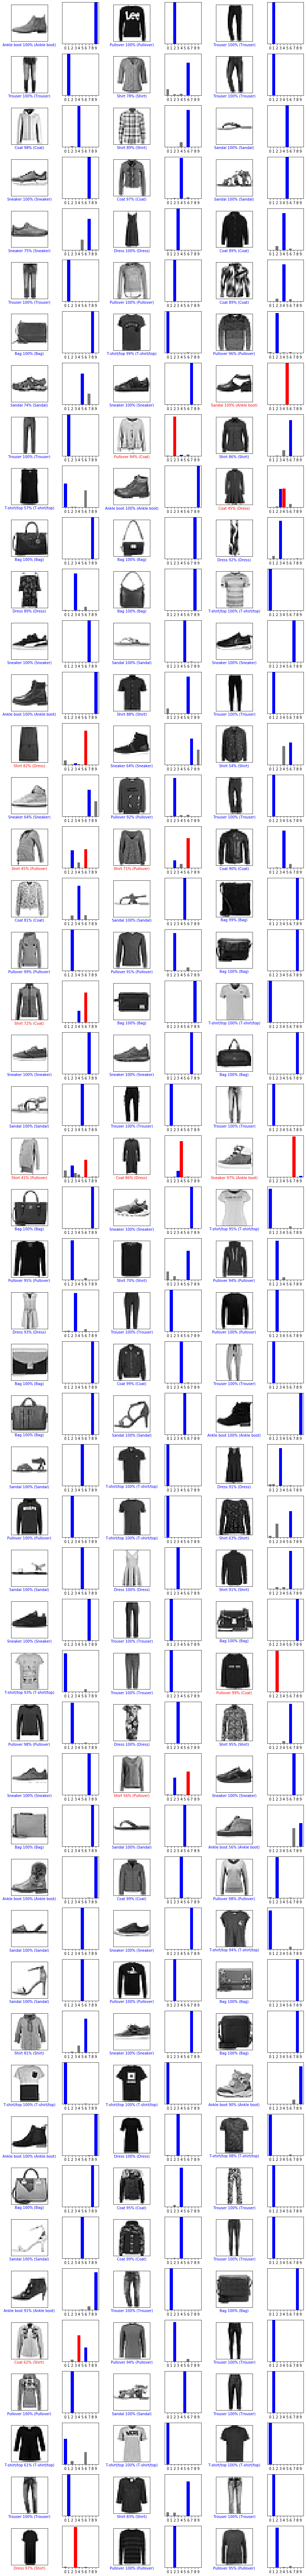

In [0]:
num_rows = 50
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))

#convert images_test dataset shape from (10000,28,28,1) to (10000, 28, 28)
images_test = images_test.reshape(images_test.shape[0], img_rows, img_cols)
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], labels_test, images_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], labels_test)
plt.tight_layout()
plt.show()